## Made Smirnov Aleksandr

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## 0. Description of the task

Classification of mobile phones by their characteristics by price from 0 to 3, where 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost).

### Context


Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

## 1. Loading and reading data

In [ ]:
url = "https://raw.githubusercontent.com/WerWebWer/ML/master/train.csv"
data_raw = pd.read_csv(url)

url = "https://raw.githubusercontent.com/WerWebWer/ML/master/test.csv"
test_raw = pd.read_csv(url)

print("Train dataset contains data about", data_raw.shape[0], "phone models with a description of", data_raw.shape[1], "parameters")
print("Test  dataset contains data about", test_raw.shape[0], "phone models with a description of", test_raw.shape[1], "parameters")

Train dataset contains data about 2000 phone models with a description of 21 parameters
Test  dataset contains data about 1000 phone models with a description of 21 parameters


In [ ]:
data_raw.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


Property:
1. battery_power - battery capacity in mAh
2. blue - presence of Bluetooth (0 - no, 1 - yes)
3. clock_speed - speed of microprocessor
4. dual_sim - support for two SIM-cards (0 - no, 1 - yes)
5. fc - resolution of the front camera in megapixels
6. four_g - 4G support (0 - no, 1 - yes)
7. int_memory - internal memory in GB
8. m_dep - phone depth in cm
9. mobile_wt - phone weight
10. n_cores - the number of processor cores
11. pc - resolution of the main camera in megapixels
12. px_height - height resolution in pixels
13. px_width - width resolution in pixels
14. ram - RAM in MB
15. sc_h - screen height in cm
16. sc_w - screen width in cm
17. talk_time - the maximum time that a single battery charge will last when you are talking on the phone
18. three_g - 3G support (0 - no, 1 - yes)
19. touch_screen - presence of a touch screen (0 - no, 1 - yes)
20. wifi - availability of wifi (0 - no, 1 - yes)
21. price_range - price range

In [ ]:
data_raw.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
data_raw.index

RangeIndex(start=0, stop=2000, step=1)

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

0. battery_power - numeric
1. blue - categorical (2)
2. clock_speed - numeric
3. dual_sim - categorical (2)
4. fc - numeric
5. four_g - categorical (2)
6. int_memory - numeric
7. m_dep - numeric
8. mobile_wt - numeric
9. n_cores - numeric
10. pc - numeric
11. px_height - numeric
12. px_width - numeric
13. ram - numeric
14. sc_h - numeric
15. sc_w - numeric
16. talk_time - numeric
17. three_g - categorical (2)
18. touch_screen - categorical (2)
19. wifi - categorical (2)
20. price_range - categorical (4)

### Emission treatment

#### Find emission

##### battery_power

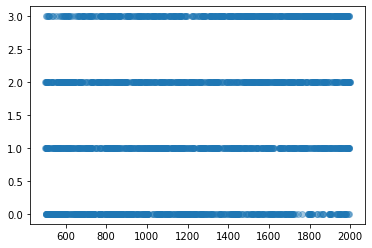

In [ ]:
plt.scatter(data_raw['battery_power'], data_raw['price_range'], alpha=0.4)

Emission are visible on the graph

In [ ]:
data_raw['battery_power'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     504.000
0.010     510.000
0.050     570.950
0.100     634.900
0.500    1226.000
0.900    1851.000
0.950    1930.150
0.990    1987.000
0.995    1992.005
Name: battery_power, dtype: float64

99.9% of battery capacity values are in the range 504 to 1992

###### Emissions are unavailable

##### blue

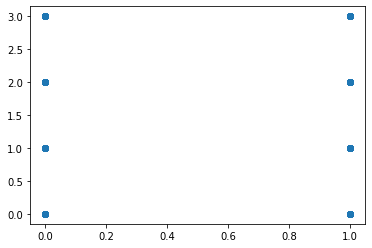

In [ ]:
plt.scatter(data_raw['blue'], data_raw['price_range'], alpha=0.4)

In [ ]:
data_raw['blue'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.0
0.010    0.0
0.050    0.0
0.100    0.0
0.500    0.0
0.900    1.0
0.950    1.0
0.990    1.0
0.995    1.0
Name: blue, dtype: float64

###### Emissions are unavailable

##### clock_speed

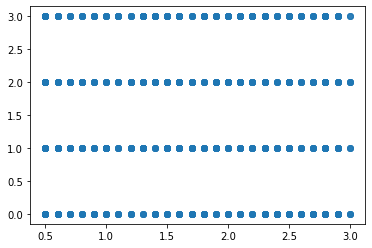

In [ ]:
plt.scatter(data_raw['clock_speed'], data_raw['price_range'], alpha=0.4)

In [ ]:
data_raw['clock_speed'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.5
0.010    0.5
0.050    0.5
0.100    0.5
0.500    1.5
0.900    2.7
0.950    2.8
0.990    3.0
0.995    3.0
Name: clock_speed, dtype: float64

###### Emissions are available

##### dual_sim

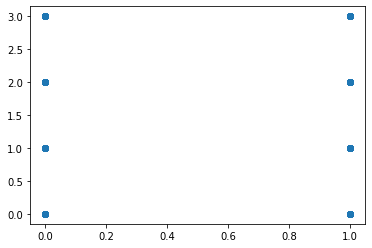

In [ ]:
plt.scatter(data_raw['dual_sim'], data_raw['price_range'], alpha=0.4)

###### Emissions are unavailable

##### fc

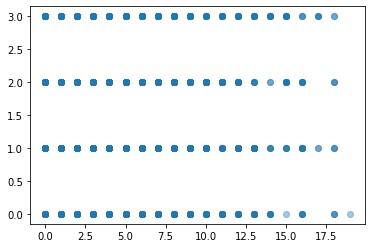

In [ ]:
plt.scatter(data_raw['fc'], data_raw['price_range'], alpha=0.4)

In [ ]:
data_raw['fc'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.0
0.010     0.0
0.050     0.0
0.100     0.0
0.500     3.0
0.900    11.0
0.950    13.0
0.990    16.0
0.995    18.0
Name: fc, dtype: float64

###### Emissions are available

##### four_g

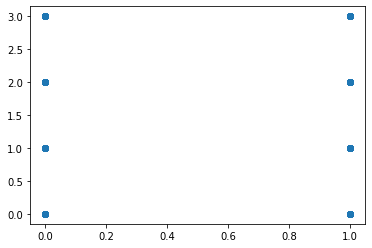

In [ ]:
plt.scatter(data_raw['four_g'], data_raw['price_range'], alpha=0.4)

###### Emissions are unavailable

##### int_memory

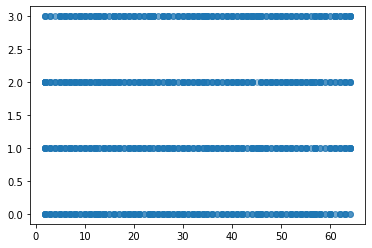

In [ ]:
plt.scatter(data_raw['int_memory'], data_raw['price_range'], alpha=0.4)

In [ ]:
data_raw['int_memory'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     2.0
0.010     2.0
0.050     5.0
0.100     7.9
0.500    32.0
0.900    57.0
0.950    61.0
0.990    64.0
0.995    64.0
Name: int_memory, dtype: float64

###### Emissions are available

##### m_dep

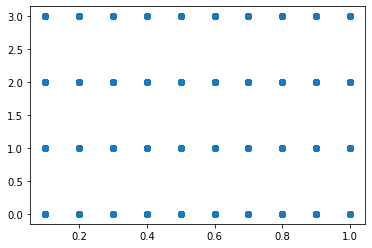

In [ ]:
plt.scatter(data_raw['m_dep'], data_raw['price_range'], alpha=0.4)

In [ ]:
data_raw['m_dep'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.1
0.010    0.1
0.050    0.1
0.100    0.1
0.500    0.5
0.900    0.9
0.950    1.0
0.990    1.0
0.995    1.0
Name: m_dep, dtype: float64

###### Emissions are available

##### mobile_wt

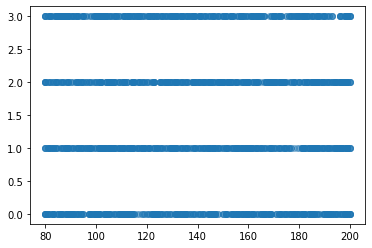

In [ ]:
plt.scatter(data_raw['mobile_wt'], data_raw['price_range'], alpha=0.4)

In [ ]:
data_raw['mobile_wt'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     80.0
0.010     80.0
0.050     86.0
0.100     91.0
0.500    141.0
0.900    189.0
0.950    196.0
0.990    199.0
0.995    200.0
Name: mobile_wt, dtype: float64

###### Emissions are available

##### n_cores

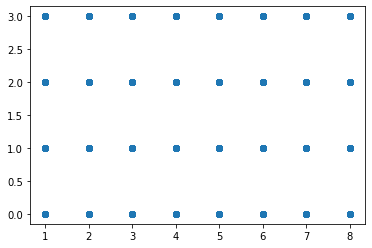

In [ ]:
plt.scatter(data_raw['n_cores'], data_raw['price_range'], alpha=0.4)

###### Emissions are unavailable

##### price_range

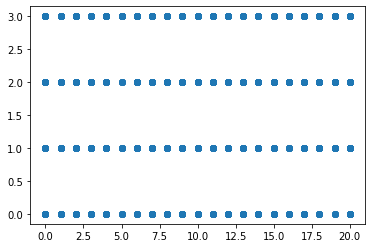

In [ ]:
plt.scatter(data_raw['pc'], data_raw['price_range'], alpha=0.4)

In [ ]:
data_raw['pc'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.0
0.010     0.0
0.050     0.0
0.100     1.0
0.500    10.0
0.900    18.0
0.950    20.0
0.990    20.0
0.995    20.0
Name: pc, dtype: float64

###### Emissions are available

##### px_height

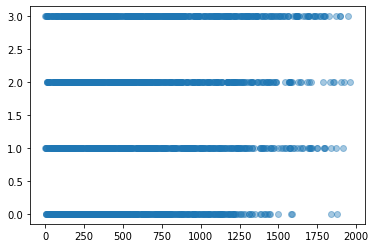

In [ ]:
plt.scatter(data_raw['px_height'], data_raw['price_range'], alpha=0.4)

In [ ]:
data_raw['px_height'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005       5.995
0.010      15.000
0.050      70.950
0.100     125.900
0.500     564.000
0.900    1285.000
0.950    1485.050
0.990    1791.010
0.995    1858.055
Name: px_height, dtype: float64

###### Emissions are unavailable

##### px_width

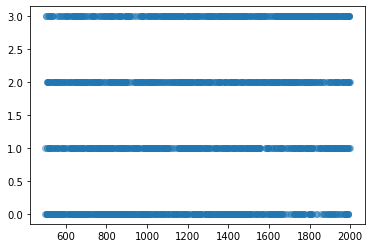

In [ ]:
plt.scatter(data_raw['px_width'], data_raw['price_range'], alpha=0.4)

In [ ]:
data_raw['px_width'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     507.995
0.010     512.990
0.050     579.850
0.100     661.900
0.500    1247.000
0.900    1854.000
0.950    1929.050
0.990    1987.000
0.995    1990.005
Name: px_width, dtype: float64

###### Emissions are available

##### ram

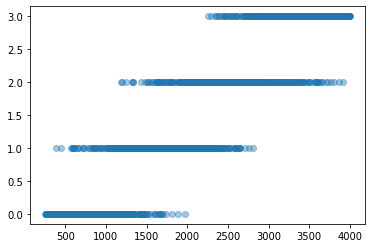

In [ ]:
plt.scatter(data_raw['ram'], data_raw['price_range'], alpha=0.4)

In [ ]:
data_raw['ram'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     277.995
0.010     296.990
0.050     445.000
0.100     605.800
0.500    2146.500
0.900    3637.700
0.950    3826.350
0.990    3958.010
0.995    3970.000
Name: ram, dtype: float64

###### Emissions are available

##### sc_h

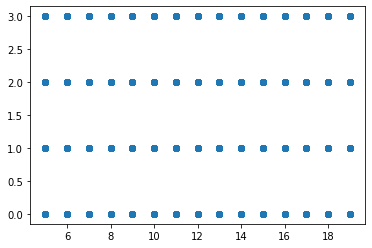

In [ ]:
plt.scatter(data_raw['sc_h'], data_raw['price_range'], alpha=0.4)

###### Emissions are unavailable

##### sc_w

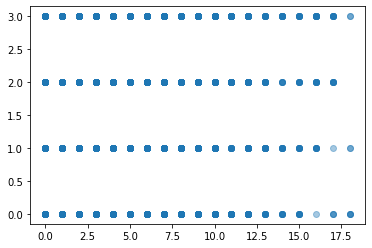

In [ ]:
plt.scatter(data_raw['sc_w'], data_raw['price_range'], alpha=0.4)

###### Emissions are unavailable

##### talk_time

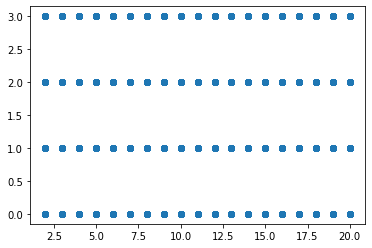

In [ ]:
plt.scatter(data_raw['talk_time'], data_raw['price_range'], alpha=0.4)

In [ ]:
data_raw['talk_time'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     2.0
0.010     2.0
0.050     3.0
0.100     4.0
0.500    11.0
0.900    19.0
0.950    20.0
0.990    20.0
0.995    20.0
Name: talk_time, dtype: float64

###### Emissions are available

##### three_g

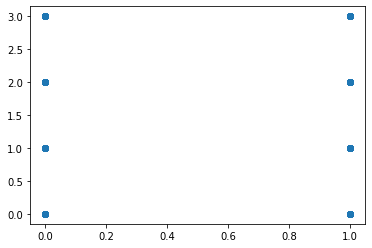

In [ ]:
plt.scatter(data_raw['three_g'], data_raw['price_range'], alpha=0.4)

###### Emissions are unavailable

##### touch_screen

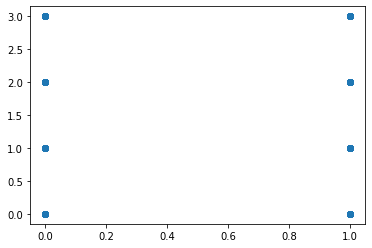

In [ ]:
plt.scatter(data_raw['touch_screen'], data_raw['price_range'], alpha=0.4)

###### Emissions are unavailable

##### price_range

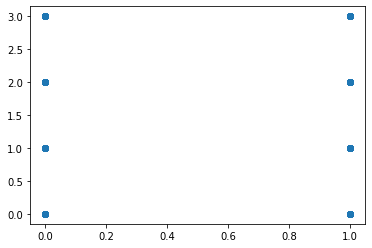

In [ ]:
plt.scatter(data_raw['wifi'], data_raw['price_range'], alpha=0.4)

###### Emissions are unavailable

#### Removal of emissions

Let's delete all the rows of the table in which features with outliers go beyond the [$ 0.005 $, $ 0.995 $] quantiles.

In [ ]:
rows_without_pass = data_raw[
    (data_raw['battery_power'] < data_raw['battery_power'].quantile(0.005)) | (data_raw['battery_power'] > data_raw['battery_power'].quantile(0.995)) | 
    (data_raw['clock_speed']  < data_raw['clock_speed' ].quantile(0.005)) | (data_raw['clock_speed']  > data_raw['clock_speed' ].quantile(0.995)) | 
    (data_raw['fc']  < data_raw['fc' ].quantile(0.005)) | (data_raw['fc']  > data_raw['fc' ].quantile(0.995)) |
    (data_raw['int_memory']  < data_raw['int_memory' ].quantile(0.005)) | (data_raw['int_memory']  > data_raw['int_memory' ].quantile(0.995)) | 
    (data_raw['m_dep']  < data_raw['m_dep' ].quantile(0.005)) | (data_raw['m_dep']  > data_raw['m_dep' ].quantile(0.995)) |
    (data_raw['mobile_wt']  < data_raw['mobile_wt' ].quantile(0.005)) | (data_raw['mobile_wt']  > data_raw['mobile_wt' ].quantile(0.995)) | 
    (data_raw['pc']  < data_raw['pc' ].quantile(0.005)) | (data_raw['pc']  > data_raw['pc' ].quantile(0.995)) |
    (data_raw['px_width']  < data_raw['px_width' ].quantile(0.005)) | (data_raw['px_width']  > data_raw['px_width' ].quantile(0.995)) | 
    (data_raw['ram']  < data_raw['ram' ].quantile(0.005)) | (data_raw['ram']  > data_raw['ram' ].quantile(0.995)) |
    (data_raw['talk_time']  < data_raw['talk_time' ].quantile(0.005)) | (data_raw['talk_time']  > data_raw['talk_time' ].quantile(0.995))].index
data = data_raw.drop(rows_without_pass)

print("Dataset contains data about", data_raw.shape[0], "phone models without pass with a description of", data_raw.shape[1], "parameters")

Dataset contains data about 2000 phone models without pass with a description of 21 parameters


In [ ]:
rows_without_pass

Int64Index([  24,   69,  152,  185,  193,  219,  292,  309,  327,  467,  625,
             634,  637,  655,  661,  696,  719,  736,  753,  799,  812,  854,
             917,  926,  940,  947,  964,  987,  988, 1027, 1041, 1115, 1144,
            1207, 1224, 1230, 1240, 1265, 1318, 1354, 1389, 1405, 1518, 1540,
            1570, 1582, 1618, 1619, 1682, 1684, 1705, 1713, 1745, 1768, 1816,
            1829, 1994],
           dtype='int64')

In [ ]:
test_without_pass = test_raw[
    (test_raw['battery_power'] < test_raw['battery_power'].quantile(0.005)) | (test_raw['battery_power'] > test_raw['battery_power'].quantile(0.995)) | 
    (test_raw['clock_speed']  < test_raw['clock_speed' ].quantile(0.005)) | (test_raw['clock_speed']  > test_raw['clock_speed' ].quantile(0.995)) | 
    (test_raw['fc']  < test_raw['fc' ].quantile(0.005)) | (test_raw['fc']  > test_raw['fc' ].quantile(0.995)) |
    (test_raw['int_memory']  < test_raw['int_memory' ].quantile(0.005)) | (test_raw['int_memory']  > test_raw['int_memory' ].quantile(0.995)) | 
    (test_raw['m_dep']  < test_raw['m_dep' ].quantile(0.005)) | (test_raw['m_dep']  > test_raw['m_dep' ].quantile(0.995)) |
    (test_raw['mobile_wt']  < test_raw['mobile_wt' ].quantile(0.005)) | (test_raw['mobile_wt']  > test_raw['mobile_wt' ].quantile(0.995)) | 
    (test_raw['pc']  < test_raw['pc' ].quantile(0.005)) | (test_raw['pc']  > test_raw['pc' ].quantile(0.995)) |
    (test_raw['px_width']  < test_raw['px_width' ].quantile(0.005)) | (test_raw['px_width']  > test_raw['px_width' ].quantile(0.995)) | 
    (test_raw['ram']  < test_raw['ram' ].quantile(0.005)) | (test_raw['ram']  > test_raw['ram' ].quantile(0.995)) |
    (test_raw['talk_time']  < test_raw['talk_time' ].quantile(0.005)) | (test_raw['talk_time']  > test_raw['talk_time' ].quantile(0.995))].index
test = test_raw.drop(test_without_pass)

## 2. Data visualization and calculation of basic characteristics

In [ ]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.00000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000
mean,1237.001544,0.497169,1.520690,0.507977,4.304683,0.519815,32.058157,0.501287,140.30211,4.512609,9.922800,645.888832,1250.928461,2125.989192,12.300051,5.748842,11.016984,0.759650,0.505404,0.508492,1.499743
std,437.052313,0.500121,0.818418,0.500065,4.345507,0.499736,18.151928,0.288919,35.36240,2.287458,6.079224,442.368889,428.276505,1076.484304,4.221474,4.359929,5.470473,0.427406,0.500100,0.500057,1.114863
min,504.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,508.000000,278.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.500000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.00000,3.000000,5.000000,286.000000,877.500000,1210.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1225.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.00000,4.000000,10.000000,570.000000,1247.000000,2148.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.000000
75%,1614.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.00000,7.000000,15.000000,949.000000,1629.500000,3058.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1992.000000,1.000000,3.000000,1.000000,18.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1960.000000,1990.000000,3970.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In the description we see:

1. count - the number of values for each feature. Due to gaps in the table, all values are different. The minimum value for dual_sim = 2867, the number of gaps = 12, which is 0.4% of the total.
2.mean - mean value
3.std - standard deviation
4.min - minimum value
5.25% - first quartile
6.50% - median
7.75% - third quartile
8.max - maximum value (note suspiciously large values - outliers, which we will fight with in the future)

Consider some of the characteristics

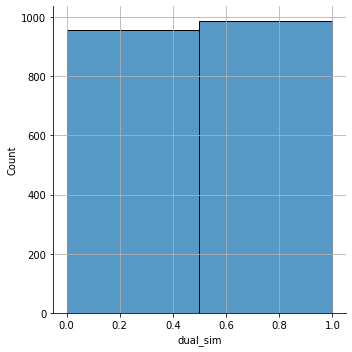

In [ ]:
sns.displot(data['dual_sim'], bins=2)
plt.grid()

The histogram shows the distribution in 2 categories: the presence and absence of support for 2 sim cards. Average = 0.511336, deviation = 0.499959. We can conclude that slightly more than half of the models have 2 sim cards.

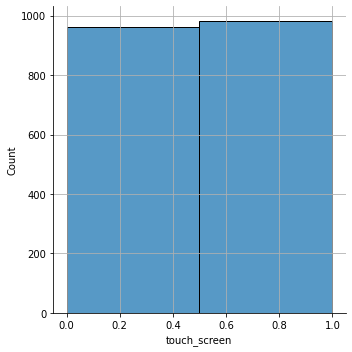

In [ ]:
sns.displot(data['touch_screen'], bins=2)
plt.grid()

We see a normal distribution by categories: the presence and absence of a touch screen. With an average = 0.507650 and a deviation = 0.500028, that is, the number of models with a touch screen and a regular one is approximately equal.

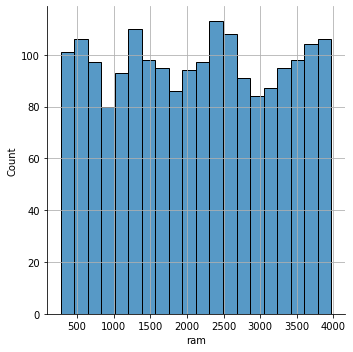

In [ ]:
sns.displot(data['ram'], bins=20)
plt.grid()

Distribution of RAM with average = 2136 and deviation = 1083. In this case, 25% = 1210, 50% = 2181, 75% = 3068.

### Calculate the correlation matrix

In [ ]:
corr_matrix = data.corr()
corr_matrix

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.002581,0.011580,-0.037543,0.036593,0.017101,-0.001801,0.036657,0.004701,-0.041971,0.036280,0.010915,-0.007400,0.004242,-0.035409,-0.028381,0.050741,0.006031,-0.011606,-0.008304,0.206171
blue,0.002581,1.000000,0.030085,0.031490,0.001582,0.012071,0.048544,0.006618,-0.011584,0.038629,-0.014637,-0.007093,-0.033772,0.030273,-0.013134,-0.004341,0.010652,-0.028479,0.007782,-0.023068,0.022394
clock_speed,0.011580,0.030085,1.000000,0.002365,0.005046,-0.049224,0.004990,-0.016424,0.008385,-0.006603,-0.000714,-0.023249,-0.013453,0.006603,-0.031890,-0.012022,-0.009372,-0.050549,0.018598,-0.027733,-0.004453
dual_sim,-0.037543,0.031490,0.002365,1.000000,-0.030503,-0.000118,-0.006376,-0.021277,-0.008537,-0.021583,-0.021648,-0.021542,0.013738,0.040846,-0.006867,-0.008764,-0.040049,-0.013912,-0.014071,0.029073,0.018246
fc,0.036593,0.001582,0.005046,-0.030503,1.000000,-0.013215,-0.031782,0.004445,0.027261,-0.015099,0.644857,-0.005947,-0.005872,0.014350,-0.013239,-0.006504,-0.007929,0.005347,-0.012605,0.021321,0.022549
four_g,0.017101,0.012071,-0.049224,-0.000118,-0.013215,1.000000,0.007394,-0.001782,-0.018303,-0.032314,0.004063,-0.023525,0.008491,0.004174,0.024884,0.039390,-0.046365,0.585242,0.015540,-0.017674,0.014104
int_memory,-0.001801,0.048544,0.004990,-0.006376,-0.031782,0.007394,1.000000,0.006063,-0.034821,-0.029837,-0.031359,0.008717,-0.009760,0.034336,0.037101,0.009463,-0.002437,-0.010675,-0.022810,0.008427,0.046705
m_dep,0.036657,0.006618,-0.016424,-0.021277,0.004445,-0.001782,0.006063,1.000000,0.022415,-0.012374,0.027615,0.027631,0.019930,-0.002105,-0.024086,-0.015972,0.013539,-0.015008,0.000130,-0.028054,0.006316
mobile_wt,0.004701,-0.011584,0.008385,-0.008537,0.027261,-0.018303,-0.034821,0.022415,1.000000,-0.017868,0.018897,0.003660,-0.001852,0.006364,-0.036871,-0.021975,0.000165,0.002217,-0.010444,0.003771,-0.023750
n_cores,-0.041971,0.038629,-0.006603,-0.021583,-0.015099,-0.032314,-0.029837,-0.012374,-0.017868,1.000000,-0.001004,-0.006691,0.019641,0.006910,0.002514,0.027476,0.013418,-0.016123,0.027286,-0.013261,0.003888


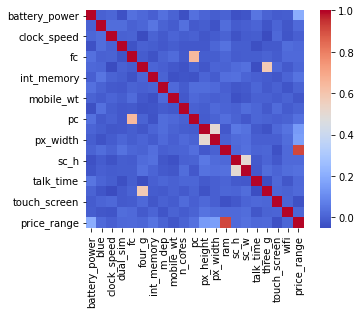

In [ ]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm')

### Correlation coefficients exceeding the specified value:

In [ ]:
corr_matrix >= 0.5

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
blue,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
clock_speed,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
dual_sim,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
fc,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
four_g,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
int_memory,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
m_dep,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
mobile_wt,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
n_cores,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


Correlation coefficients> 0.5 have: px_width and px_height, sc_h and sc_w, four_g and three_g, price_range and ram, which indicates the presence of a relationship between the features.
For features with a correlation coefficient <0.5, we can say that the relationship between them is weak.



### Consider categorical features 

In [ ]:
data['blue'].value_counts()

0    977
1    966
Name: blue, dtype: int64

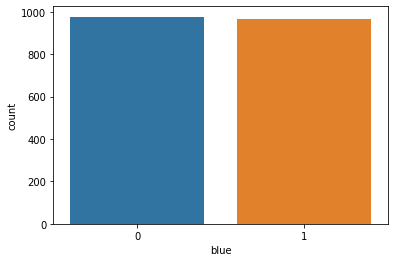

In [ ]:
sns.countplot(x='blue', data=data)

The number of models with bluetooth is approximately equal to the number of models without it.

In [ ]:
data['dual_sim'].value_counts()

1    987
0    956
Name: dual_sim, dtype: int64

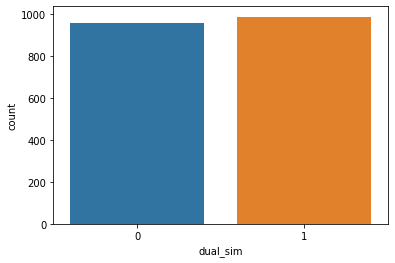

In [ ]:
sns.countplot(x='dual_sim', data=data)

The number of models with support for 2 SIM cards is slightly larger

In [ ]:
data['four_g'].value_counts()

1    1010
0     933
Name: four_g, dtype: int64

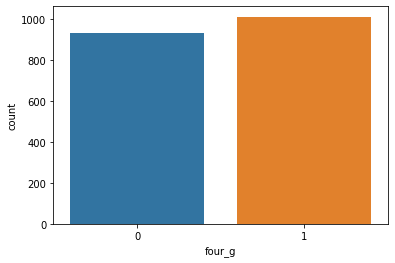

In [ ]:
sns.countplot(x='four_g', data=data)

The number of 4G models is slightly higher.

In [ ]:
data['three_g'].value_counts()

1    1476
0     467
Name: three_g, dtype: int64

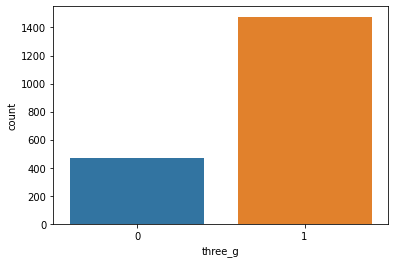

In [ ]:
sns.countplot(x='three_g', data=data)

The number of models with 3G support is about 3 times more

In [ ]:
data['touch_screen'].value_counts()

1    982
0    961
Name: touch_screen, dtype: int64

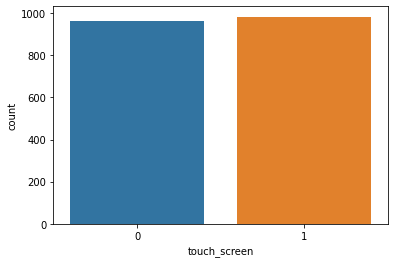

In [ ]:
sns.countplot(x='touch_screen', data=data)

The number of models with a touchscreen is approximately equal to the number of models without it

In [ ]:
data['wifi'].value_counts()

1    988
0    955
Name: wifi, dtype: int64

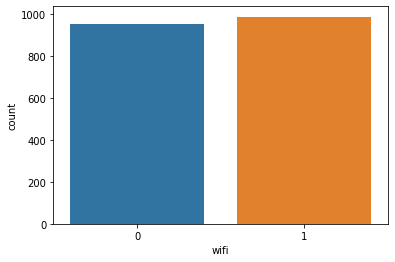

In [ ]:
sns.countplot(x='wifi', data=data)

The number of models with WiFi support is slightly higher

In [ ]:
data['price_range'].value_counts()

1    490
2    489
3    482
0    482
Name: price_range, dtype: int64

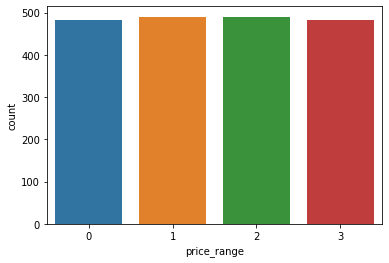

In [ ]:
sns.countplot(x='price_range', data=data)

The price range is set approximately the same

## 3. Handling Missing Values


The number of missing values is small

In [ ]:
data.dropna(axis=0, how='all', subset=['battery_power'], inplace=True)
data.dropna(axis=0, how='all', subset=['blue'], inplace=True)
data.dropna(axis=0, how='all', subset=['clock_speed'], inplace=True)
data.dropna(axis=0, how='all', subset=['dual_sim'], inplace=True)
data.dropna(axis=0, how='all', subset=['fc'], inplace=True)
data.dropna(axis=0, how='all', subset=['four_g'], inplace=True)
data.dropna(axis=0, how='all', subset=['int_memory'], inplace=True)
data.dropna(axis=0, how='all', subset=['m_dep'], inplace=True)
data.dropna(axis=0, how='all', subset=['mobile_wt'], inplace=True)
data.dropna(axis=0, how='all', subset=['n_cores'], inplace=True)
data.dropna(axis=0, how='all', subset=['pc'], inplace=True)
data.dropna(axis=0, how='all', subset=['px_height'], inplace=True)
data.dropna(axis=0, how='all', subset=['px_width'], inplace=True)
data.dropna(axis=0, how='all', subset=['ram'], inplace=True)
data.dropna(axis=0, how='all', subset=['sc_h'], inplace=True)
data.dropna(axis=0, how='all', subset=['sc_w'], inplace=True)
data.dropna(axis=0, how='all', subset=['talk_time'], inplace=True)
data.dropna(axis=0, how='all', subset=['three_g'], inplace=True)
data.dropna(axis=0, how='all', subset=['touch_screen'], inplace=True)
data.dropna(axis=0, how='all', subset=['wifi'], inplace=True)
print(data.shape)
data.isna().sum()

(1943, 21)


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## 4. Processing categorical features

All categorical features are already specified by numerical values

## 5. Normalization

Let us carry out normalization using a linear transformation to the segment [0, 1] 

In [ ]:
data_norm = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
data_norm.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000
mean,0.492609,0.497169,0.408276,0.507977,0.239149,0.519815,0.484809,0.445874,0.502518,0.501801,0.496140,0.329535,0.501301,0.500539,0.521432,0.319380,0.500944,0.759650,0.505404,0.508492,0.499914
std,0.293718,0.500121,0.327367,0.500065,0.241417,0.499736,0.292773,0.321021,0.294687,0.326780,0.303961,0.225698,0.288985,0.291572,0.301534,0.242218,0.303915,0.427406,0.500100,0.500057,0.371621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233535,0.000000,0.080000,0.000000,0.055556,0.000000,0.225806,0.111111,0.241667,0.285714,0.250000,0.145918,0.249325,0.252573,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000,0.333333
50%,0.484543,0.000000,0.400000,1.000000,0.166667,1.000000,0.483871,0.444444,0.508333,0.428571,0.500000,0.290816,0.498650,0.506501,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000,0.333333
75%,0.745968,1.000000,0.680000,1.000000,0.388889,1.000000,0.741935,0.777778,0.750000,0.857143,0.750000,0.484184,0.756748,0.752979,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test_norm = (test - test.min(axis=0)) / (test.max(axis=0) - test.min(axis=0))
test_norm.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.00000,964.000000
mean,0.501050,0.498452,0.519710,0.418382,0.515560,0.253976,0.485477,0.507847,0.463347,0.499677,0.473622,0.501245,0.328798,0.493417,0.502286,0.497333,0.292301,0.505417,0.757261,0.50000,0.502075
std,0.289765,0.288954,0.499871,0.331756,0.500017,0.245872,0.500048,0.292799,0.311815,0.292050,0.327727,0.304890,0.227005,0.294332,0.292977,0.306684,0.234572,0.305430,0.428961,0.50026,0.500255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.252002,0.261141,0.000000,0.080000,0.000000,0.055556,0.000000,0.258065,0.222222,0.243697,0.142857,0.250000,0.136864,0.219215,0.259856,0.214286,0.111111,0.263889,1.000000,0.00000,0.000000
50%,0.500000,0.496624,1.000000,0.400000,1.000000,0.166667,0.000000,0.516129,0.444444,0.495798,0.428571,0.500000,0.296539,0.502030,0.507341,0.500000,0.222222,0.500000,1.000000,0.50000,1.000000
75%,0.754004,0.754389,1.000000,0.720000,1.000000,0.388889,1.000000,0.758065,0.777778,0.756303,0.714286,0.800000,0.472601,0.760656,0.752243,0.785714,0.444444,0.777778,1.000000,1.00000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


## 6. Training and test samples

We use all the signs for classification. Let's split the data into training and test samples. We will take 75% for the training, the rest - for the test 

In [ ]:
X = data_norm.drop(['price_range'], axis=1)
y = data['price_range']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(1457, 486)

In [ ]:
y_test

1657    1
1443    0
1771    2
1085    2
315     3
       ..
1591    2
1104    1
1342    1
343     3
891     3
Name: price_range, Length: 486, dtype: int64

## 7. Model training



### K nearest neighbors

#### K nearest neighbors (K = 5 - default )

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_def = KNeighborsClassifier()
knn_def.fit(X_train, y_train)
knn_train_pred = 100 * knn_def.score(X_train, y_train)
knn_test_pred = 100 * knn_def.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_train_pred, knn_test_pred))

Accuracy. Train : 62.46%, Test: 39.30%. 


#### K nearest neighbors (K = 7)

In [ ]:
knn_9 = KNeighborsClassifier(n_neighbors = 9)
knn_9.fit(X_train, y_train)
knn_train_pred = 100 * knn_9.score(X_train, y_train)
knn_test_pred = 100 * knn_9.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_train_pred, knn_test_pred))

Accuracy. Train : 60.33%, Test: 41.77%. 


#### K nearest neighbors (K = 2)

In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors = 2)
knn_2.fit(X_train, y_train)
knn_train_pred = 100 * knn_2.score(X_train, y_train)
knn_test_pred = 100 * knn_2.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_train_pred, knn_test_pred))

Accuracy. Train : 70.08%, Test: 34.16%. 


The accuracy has increased. Let's calculate the root mean square error for the algorithm with the default number of nearest neighbors

In [ ]:
knn_train_pred = knn_def.score(X_train, y_train)
knn_test_pred = knn_def.score(X_test, y_test)
MSE_train = np.mean((knn_train_pred - y_train)**2)
MSE_test  = np.mean((knn_test_pred - y_test)**2)
print("MSE. Train : {:.2f}, Test: {:.2f}. ".format(MSE_train, MSE_test))

MSE. Train : 2.04, Test: 2.36. 


### Decision tree

#### Use default parameters - no depth

In [ ]:
from sklearn.tree import DecisionTreeClassifier
desTrCl = DecisionTreeClassifier()
desTrCl.fit(X_train,y_train)
desTrCl_train_sc = 100 * desTrCl.score(X_train, y_train)
print ('Depth:', desTrCl.get_depth())
print ('Leaves:', desTrCl.get_n_leaves())
desTrCl_test_sc = 100 * desTrCl.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(desTrCl_train_sc, desTrCl_test_sc))

Depth: 14
Leaves: 157
Accuracy. Train : 100.00%, Test: 82.92%. 


#### Maximum depth = 12. Reduced to 6

In [ ]:
desTrCl_6 = DecisionTreeClassifier(max_depth=6)
desTrCl_6.fit(X_train,y_train)
desTrCl_train_sc = 100 * desTrCl_6.score(X_train, y_train)
print ('Depth:', desTrCl_6.get_depth())
print ('Leaves:', desTrCl_6.get_n_leaves())
desTrCl_test_sc = 100 * desTrCl_6.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(desTrCl_train_sc, desTrCl_test_sc))

Depth: 6
Leaves: 59
Accuracy. Train : 91.63%, Test: 84.98%. 


The quality of the model on the test and training samples has decreased.

#### Increase the depth to 9

In [ ]:
desTrCl_9 = DecisionTreeClassifier(max_depth=9)
desTrCl_9.fit(X_train,y_train)
desTrCl_train_sc = 100 * desTrCl_9.score(X_train, y_train)
print ('Depth:', desTrCl_9.get_depth())
print ('Leaves:', desTrCl_9.get_n_leaves())
desTrCl_test_sc = 100 * desTrCl_9.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(desTrCl_train_sc, desTrCl_test_sc))

Depth: 9
Leaves: 136
Accuracy. Train : 98.63%, Test: 84.36%. 


The quality of the model on the test and training samples has increased.

The decision tree algorithm turned out to be more accurate than the k-nearest neighbors algorithm for the optimal parameters of each of the methods, both on the training sample and on the test one.

## 10. General conclusions

The work analyzed data on the price range of mobile phones and solved the classification problem using models that were trained by the methods of K-nearest neighbors and a decision tree.

In the course of the work carried out:
1. Dealing with emissions
2. Calculation of the main statistical characteristics and their analysis
3. Handling missing values ​​(deleting rows with missing values)
4. Normalization of quantitative features (using a linear transformation to the segment [0, 1])
5. Partitioning the data into training and test samples
6. Choosing a classification algorithm and checking the quality of the model
7. Comparison of 2 models, the decision tree algorithm turned out to be better than the k-nearest neighbors method.

## Test dataset classification

In [ ]:
test_norm = test_norm.drop(['id'], axis=1)
test_pred = desTrCl_6.predict(test_norm)


# For last Step - HW 6

## Init

In [ ]:
from tqdm import tqdm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 1. Database merge

In [ ]:
data = pd.merge(data_raw, test_raw, how='outer')
data.shape

(3000, 21)

Удаление выбросов

In [ ]:
rows_to_drop = data[
    (data['battery_power'] < data['battery_power'].quantile(0.005)) | (data['battery_power'] > data['battery_power'].quantile(0.995)) | 
    (data['clock_speed']  < data['clock_speed' ].quantile(0.005)) | (data['clock_speed']  > data['clock_speed' ].quantile(0.995)) | 
    (data['fc']  < data['fc' ].quantile(0.005)) | (data['fc']  > data['fc' ].quantile(0.995)) |
    (data['int_memory']  < data['int_memory' ].quantile(0.005)) | (data['int_memory']  > data['int_memory' ].quantile(0.995)) | 
    (data['m_dep']  < data['m_dep' ].quantile(0.005)) | (data['m_dep']  > data['m_dep' ].quantile(0.995)) |
    (data['mobile_wt']  < data['mobile_wt' ].quantile(0.005)) | (data['mobile_wt']  > data['mobile_wt' ].quantile(0.995)) | 
    (data['pc']  < data['pc' ].quantile(0.005)) | (data['pc']  > data['pc' ].quantile(0.995)) |
    (data['px_width']  < data['px_width' ].quantile(0.005)) | (data['px_width']  > data['px_width' ].quantile(0.995)) | 
    (data['ram']  < data['ram' ].quantile(0.005)) | (data['ram']  > data['ram' ].quantile(0.995)) |
    (data['talk_time']  < data['talk_time' ].quantile(0.005)) | (data['talk_time']  > data['talk_time' ].quantile(0.995))].index
data = data.drop(rows_to_drop)
data.shape

(2879, 21)

In [ ]:
data.dropna(axis=0, how='all', subset=['battery_power'], inplace=True)
data.dropna(axis=0, how='all', subset=['blue'], inplace=True)
data.dropna(axis=0, how='all', subset=['clock_speed'], inplace=True)
data.dropna(axis=0, how='all', subset=['dual_sim'], inplace=True)
data.dropna(axis=0, how='all', subset=['fc'], inplace=True)
data.dropna(axis=0, how='all', subset=['four_g'], inplace=True)
data.dropna(axis=0, how='all', subset=['int_memory'], inplace=True)
data.dropna(axis=0, how='all', subset=['m_dep'], inplace=True)
data.dropna(axis=0, how='all', subset=['mobile_wt'], inplace=True)
data.dropna(axis=0, how='all', subset=['n_cores'], inplace=True)
data.dropna(axis=0, how='all', subset=['pc'], inplace=True)
data.dropna(axis=0, how='all', subset=['px_height'], inplace=True)
data.dropna(axis=0, how='all', subset=['px_width'], inplace=True)
data.dropna(axis=0, how='all', subset=['ram'], inplace=True)
data.dropna(axis=0, how='all', subset=['sc_h'], inplace=True)
data.dropna(axis=0, how='all', subset=['sc_w'], inplace=True)
data.dropna(axis=0, how='all', subset=['talk_time'], inplace=True)
data.dropna(axis=0, how='all', subset=['three_g'], inplace=True)
data.dropna(axis=0, how='all', subset=['touch_screen'], inplace=True)
data.dropna(axis=0, how='all', subset=['wifi'], inplace=True)
print(data.shape)
data.isna().sum()

(2721, 21)


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Нормализация

In [ ]:
data_norm = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
data_norm.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,...,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000
mean,0.494282,0.488423,0.409247,0.508269,0.238985,0.514149,0.490190,0.448242,0.506517,0.504069,...,0.327427,0.499883,0.505929,0.524203,0.318857,0.498489,0.755972,0.505696,0.514884,0.507902
std,0.293952,0.499958,0.328669,0.500024,0.241883,0.499892,0.293178,0.318928,0.294342,0.326937,...,0.226641,0.289104,0.292533,0.300177,0.242910,0.301650,0.429588,0.500059,0.499870,0.373484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233557,0.000000,0.080000,0.000000,0.055556,0.000000,0.225806,0.111111,0.241667,0.285714,...,0.140306,0.247811,0.254531,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000,0.333333
50%,0.489933,0.000000,0.400000,1.000000,0.166667,1.000000,0.483871,0.444444,0.516667,0.428571,...,0.286224,0.498316,0.520151,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000,0.666667
75%,0.746980,1.000000,0.680000,1.000000,0.388889,1.000000,0.741935,0.777778,0.758333,0.857143,...,0.485204,0.750168,0.757371,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Selection of hyperparameters


### Подбор числа нейронов в однослойном классификаторе
В качестве  алгоритма оптимизации выберем алгоритм Adam, в качестве функции активации выберем Relu, в качетве метрики оценки классификатора возьмем accuracy_score.

In [ ]:
hidden_layer_size = np.linspace(1, 60, 60)
hidden_layer_size = hidden_layer_size.astype(int)
test_err, train_err = [], []
train_acc, test_acc = [], []

for size in tqdm(hidden_layer_size):
    model = MLPClassifier(hidden_layer_sizes=(size,), 
                          solver='adam', activation='relu', max_iter=3000, random_state=13)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████| 60/60 [03:24<00:00,  3.41s/it]


Train: minimum value error = 0.0, number of neurons = 14
Test: minimum value error = 0.016152716593245228, number of neurons = 3


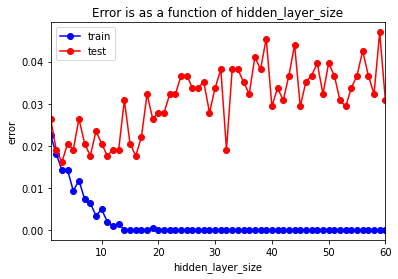

In [ ]:
plt.plot(hidden_layer_size, train_err, 'b-o', label = 'train')
plt.plot(hidden_layer_size, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Error is as a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('error')
plt.legend()

print(f"Train: minimum value error = {np.min(train_err)}, number of neurons = {hidden_layer_size[np.argmin(train_err)]}")
print(f"Test: minimum value error = {np.min(test_err)}, number of neurons = {hidden_layer_size[np.argmin(test_err)]}")

Рассмотрим как у нас менялась метрика в зависимости от гиперпараметра

Train: maximum value accuracy = 1.0, number of neurons = 14
Test: maximum value accuracy = 0.9838472834067548, number of neurons = 3


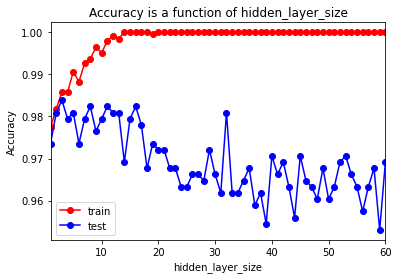

In [ ]:
plt.plot(hidden_layer_size, train_acc, 'r-o', label = 'train')
plt.plot(hidden_layer_size, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Accuracy is a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('Accuracy')
plt.legend()

print(f"Train: maximum value accuracy = {np.max(train_acc)}, number of neurons = {hidden_layer_size[np.argmax(train_acc)]}")
print(f"Test: maximum value accuracy = {np.max(test_acc)}, number of neurons = {hidden_layer_size[np.argmax(test_acc)]}")

### Подбор числа нейронов в двухслойном классификаторе

In [ ]:
n = 10
sizes = np.linspace(1, 60, n).astype(int)
test_err = np.zeros((n, n))
train_err = np.zeros((n, n))
train_acc = np.zeros((n, n))
test_acc = np.zeros((n, n))

for i, size_1 in tqdm(enumerate(sizes)):
    for j, size_2 in enumerate(sizes):
        model = MLPClassifier(hidden_layer_sizes=(size_1, size_2, ), 
                              solver='adam', activation='relu', max_iter=3000, random_state=13)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_err[i][j] = np.mean(y_train != y_train_pred)
        test_err[i][j] = np.mean(y_test != y_test_pred)

        train_acc[i][j] = accuracy_score(y_train, y_train_pred)
        test_acc[i][j] = accuracy_score(y_test, y_test_pred)

10it [03:58, 23.81s/it]


Train: minimum value error = 0.0, number of neurons = (1, 1)
Test: minimum value error = 0.016152716593245228, number of neurons = (1, 1)


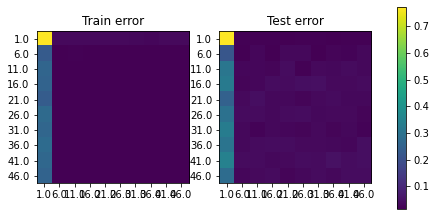

In [ ]:
plt.subplot(121)
plt.title("Train error")
plt.imshow(train_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test error")
plt.imshow(test_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.96, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_min_loss = np.where(train_err == np.min(train_err))
test_min_loss = np.where(test_err == np.min(test_err))

train_min_loss_sizes = np.where(train_err == np.min(train_err))
print(f"Train: minimum value error = {np.min(train_err)}, number of neurons = (" \
      f"{train_min_loss_sizes[0][0]}, {train_min_loss_sizes[1][0]})")

test_min_loss_sizes = np.where(test_err == np.min(test_err))
print(f"Test: minimum value error = {np.min(test_err)}, number of neurons = (" \
      f"{test_min_loss_sizes[0][0]}, {test_min_loss_sizes[1][0]})")

Train: maximum value accuracy = 1.0, number of neurons = (1, 1)
Test: maximum value accuracy = 0.9838472834067548, number of neurons = (1, 1)


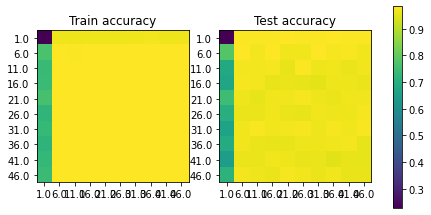

In [ ]:
plt.subplot(121)
plt.title("Train accuracy")
plt.imshow(train_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test accuracy")
plt.imshow(test_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.95, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_max_acc = np.where(train_acc == np.max(train_acc))
test_max_acc = np.where(test_acc == np.max(test_acc))


train_max_acc_sizes = np.where(train_acc == np.max(train_acc))
print(f"Train: maximum value accuracy = {np.max(train_acc)}, number of neurons = (" \
      f"{train_max_acc_sizes[0][0]}, {train_max_acc_sizes[1][0]})")

test_max_acc_sizes = np.where(test_acc == np.max(test_acc))
print(f"Test: maximum value accuracy = {np.max(test_acc)}, number of neurons = (" \
      f"{test_max_acc_sizes[0][0]}, {test_max_acc_sizes[1][0]})")

### Подбор параметра регуляризации

In [ ]:
alpha_arr = np.logspace(-5, 5, 50)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in tqdm(alpha_arr):
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (22,), 
                              solver='adam', activation='relu', max_iter=1000, random_state=13)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████| 50/50 [01:38<00:00,  1.96s/it]


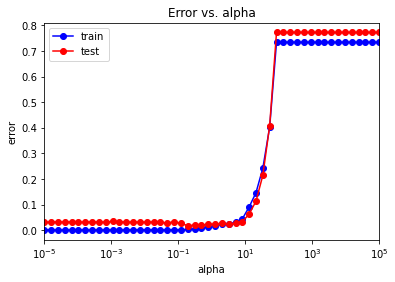

In [ ]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

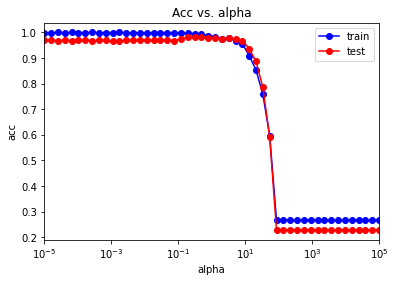

In [ ]:
plt.semilogx(alpha_arr, train_acc, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Acc vs. alpha')
plt.xlabel('alpha')
plt.ylabel('acc')
plt.legend()

## Общие выводы

###  Подбор числа нейронов в однослойном классификаторе
1) Так как графики Error/Accuracy для train/test почти полностью совпадают, делаем вывод об одиноковом распределении тренировочных и тестовых данных.

2) Переобучения нет, следовательно в моделе нет высоких весовых значений и она достаточно простая, чтобы уметь обобщаться.

3) Недообучения так же нет, то есть модель достаточно сложная, чтобы решить поставленную задачу.

4) Максимальное значение accuracy = 98.4%, число нейронов = 3

### Подбор числа нейронов в двухслойном классификаторе
1) Переобучения и недобучения также нет.

2) Максимальное значение accuracy = 98.4%, число нейронов = (1, 1)

3) Число нейронов уменьшилось на 1, значение accuracy не изменилось

### Подбор параметра регуляризации
C ростом коэффициента регуляризации растет ошибка и падает accuracy, что говорит о том, что после обучения у модели не возникает больших значения весовых коэффициентов, а значит нет переобучения у модели.